In [6]:
import pandas as pd
import numpy as np
from utils.conn_data import load_pickle
import os
from os.path import join
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
outputs_path = os.path.join(os.path.dirname(os.getcwd()), "src", "data", "outputs")

fs_methods = ["lasso", "multivariate-granger", "pairwise-granger", "var-lingam", "dynotears"]
#fs_methods = ["lasso", "multivariate-granger", "var-lingam"]

In [13]:
outputs_path

'/Users/yutong/Desktop/causal/cml-fin/src/data/outputs'

In [60]:
class backtester:
    def __init__(self, dfPred):
        self.yPred = dfPred["prediction"]
        self.yTrue = dfPred["true"]
        
    def simpleStrategy(self):
        self.stratName = "simple"
        self.pnl = np.sign(self.yPred) * self.yTrue
        #self.pnl = self.pnl.reshape(-1)
        return self.pnl


def calculateSharpeRatio(dfPnl, annulaize = 12, rf = 0):
    sr = (dfPnl.mean() - rf) / dfPnl.std() * np.sqrt(annulaize)
    return sr

def calculateAnnualizedReturn(dfPnl, annulaize = 12):
    cr = dfPnl.mean() * annulaize * 100
    return cr

In [61]:
etf = "SPY"
for i, fs in enumerate(fs_methods):
    results_files = glob.glob(os.path.join(outputs_path, fs, "etfs_macro_large", f"{etf}*.pickle"))
    dfPred = load_pickle(results_files[0])["predictions"]
    dfPred = np.log(1 + dfPred / 100)
    
    bt = backtester(dfPred)
    bt.simpleStrategy()
    
    if i == 0:
        dfPnl = dfPred[["true"]].copy()
        dfPnl.columns = [etf]
    dfPnl[fs] = bt.pnl

    

In [89]:
dfPred

,prediction,true
date,,
2004-02-29,0.012459,0.004096
2004-03-31,0.010306,-0.004393
2004-04-30,0.005299,-0.002765
2004-05-31,-0.000369,0.003164
2004-06-30,-0.000405,0.004290
...,...,...
2022-08-31,0.000352,-0.009377
2022-09-30,-0.000143,-0.023553
2022-10-31,-0.000528,0.013262


In [62]:
calculateSharpeRatio(dfPnl)

SPY                     0.318201
lasso                   0.633311
multivariate-granger    0.414359
pairwise-granger        0.442841
var-lingam              0.326357
dynotears               0.244413
dtype: float64

In [63]:
calculateAnnualizedReturn(dfPnl)

SPY                     1.124156
lasso                   2.210061
multivariate-granger    1.457129
pairwise-granger        1.558367
var-lingam              1.152718
dynotears               0.864967
dtype: float64

Text(0, 0.5, 'Cumulative returns (%)')

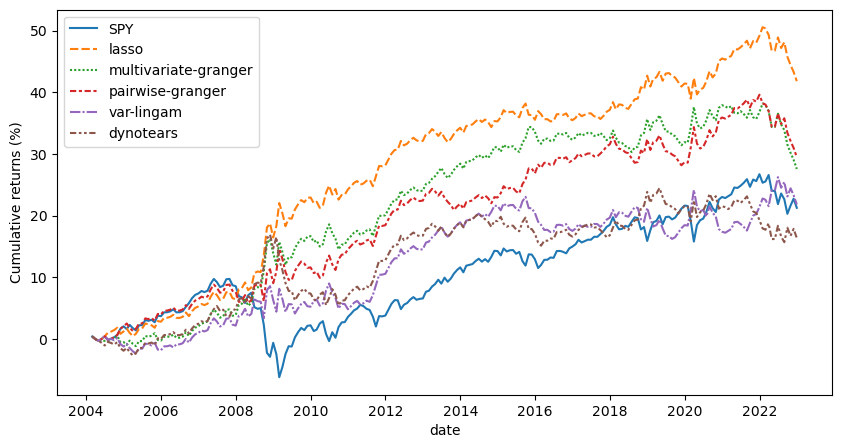

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
sns.lineplot(data = dfPnl.cumsum() * 100, ax = ax)
ax.set_ylabel("Cumulative returns (%)")

In [88]:
fig.savefig("PnLPlot.png", bbox_inches = "tight")